<a href="https://colab.research.google.com/github/gatimo256/sales-predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import libraries
import pandas as pd

In [3]:
#Load the Dataset
filename = '/content/drive/MyDrive/CodingDojo Datascience/sales_predictions.csv'
df = pd.read_csv(filename)


In [4]:
#return the first five (5) rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) How many rows and columns?

In [ ]:
#Find the number of rows and columns
df.shape

(8523, 12)

2) What are the datatypes of each variable?

In [ ]:
#Show the datatypes of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3) Are there duplicates? If so, drop any duplicates.

In [ ]:
#Find Duplicates
df.duplicated().sum()

0

There are No Duplicates.. That is Good

4) Identify missing values.

In [ ]:
#Identify Missing Values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weight and Outlet Size have missing values

In [ ]:
#Lets Check what percentage is missing from Item Weight
missing_item_weight = df['Item_Weight'].isna().sum()

In [ ]:
total_no_rows = df.shape[0]
total_no_rows 

8523

In [ ]:
#Percentage 
percentage = (missing_item_weight/total_no_rows)*100
print(f'Percenatage of missing values from Item_Weight Row is {percentage}%')

Percenatage of missing values from Item_Weight Row is 17.165317376510618%


In [ ]:
#Lets Check percentage is missing from Outlet size
missing_Outlet_size = df['Outlet_Size'].isna().sum()

In [ ]:
#Percentage 
percentage = (missing_Outlet_size/total_no_rows)*100
print(f'Percenatage of missing values from Outlet_Size Row is {percentage}%')

Percenatage of missing values from Outlet_Size Row is 28.27642848762173%


In [ ]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

Because Item Weight is a float and maybe useful for analysis in the future we shall replace the missing values with a the median value. 

In [ ]:
#Find Median 
item_weight_median = df['Item_Weight'].median()

In [ ]:
df['Item_Weight'].fillna(item_weight_median, inplace=True)
df['Item_Weight'].isna().sum()

0

In [ ]:
df['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [ ]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
#Checking for patterns in the Outlet_Size null values
outlet_size_is_null_filter = df['Outlet_Size'].isnull() == True
df[outlet_size_is_null_filter].head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972


In [ ]:
#Because Outlet Size is a categorical feature, we shall use mode(the most frequent value) to replace missing values
outlet_size_mode = df['Outlet_Size'].mode()[0]
outlet_size_mode

'Medium'

In [ ]:

df['Outlet_Size'].fillna(outlet_size_mode, inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

6) Confirm that there are no missing values after addressing them.

In [ ]:
#Confirm that there are no missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7. Finding Incosistent Categories of Data. 

In [ ]:
#Get information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#what are the unique values
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#What are the unique values in Item Type
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
#Show the unique values in the Outlet Type
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
#Show the unique values in Outlet Location Type Column
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
#Show the unique values in Item_Fat_Contet
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Found Inconsistencies in the Item Fat Content Column


In [5]:
#create a dictionaary for values will replace the inconsistent values with 
item_fat_mapping = mappings = {'LF': 'Low Fat',
                               'reg': 'Regular',
                               'low fat': 'Low Fat'
                               }

In [6]:
#replace values with mappings then
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(item_fat_mapping)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

8. For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [ ]:
#The describe() method shows the statistical summary of all numerical columns. 
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Item Features Histograms

Text(0, 0.5, 'Count')

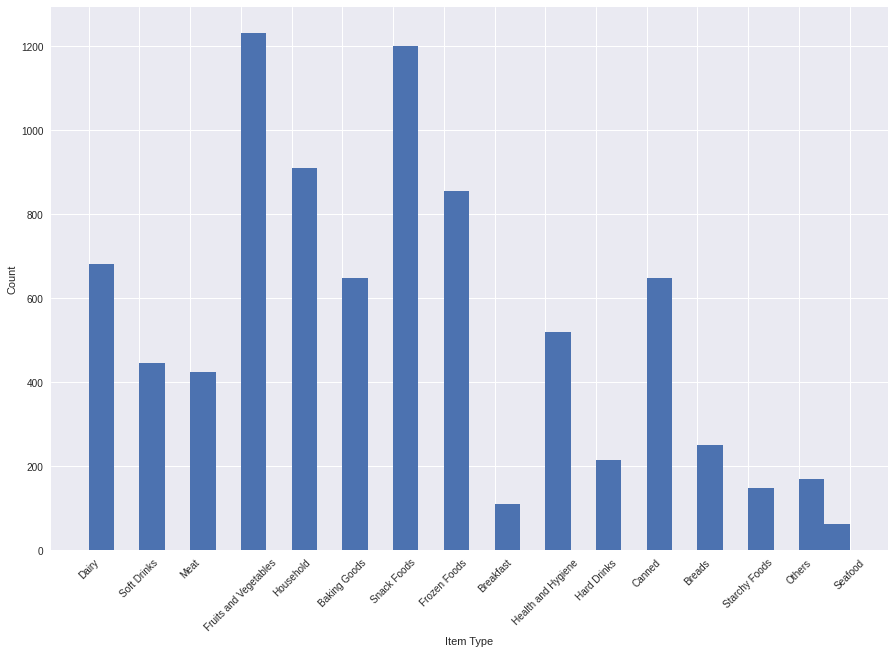

In [ ]:
#Histogram Showing Item Type Distribution
plt.style.use('seaborn')
plt.figure(figsize=(15, 10))
df['Item_Type'].hist(bins =30);
plt.xticks(rotation =45)
plt.legend()

plt.xlabel("Item Type")
plt.ylabel("Count")


The most Item types are Fruints and Vegetables and Snack Foods. The least Item Types are Breakfast and Seafood.

Text(0, 0.5, 'Count')

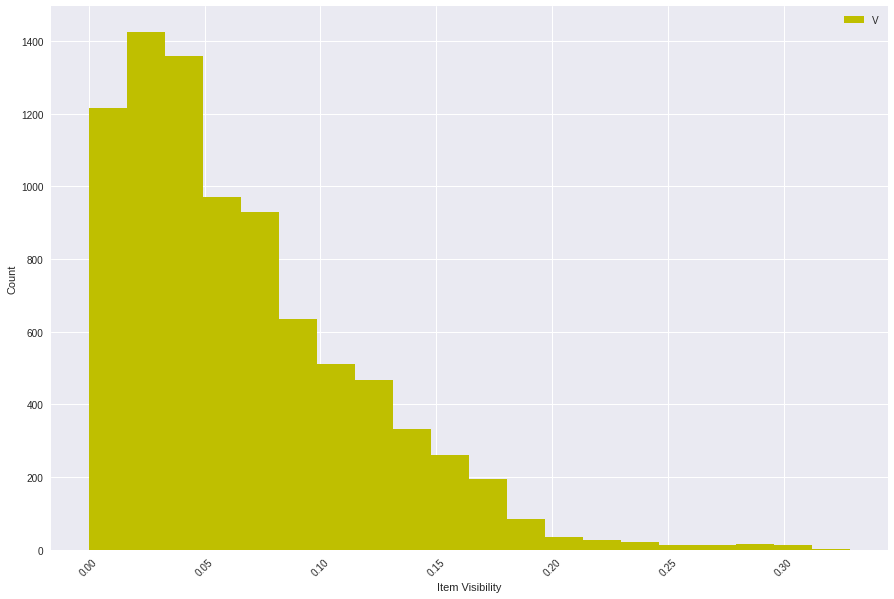

In [ ]:
#Histogram showing Item_visibility Distribution
plt.style.use('seaborn')
plt.figure(figsize=(15, 10))
df['Item_Visibility'].hist(bins =20,color='y');
plt.xticks(rotation =45)
plt.legend('Visibility')

plt.xlabel("Item Visibility")
plt.ylabel("Count")

There are many more Items with low visibilty compared to ones with high visibility. Might want to see a correlation between this and Item Sales later. 

Text(0, 0.5, 'Count')

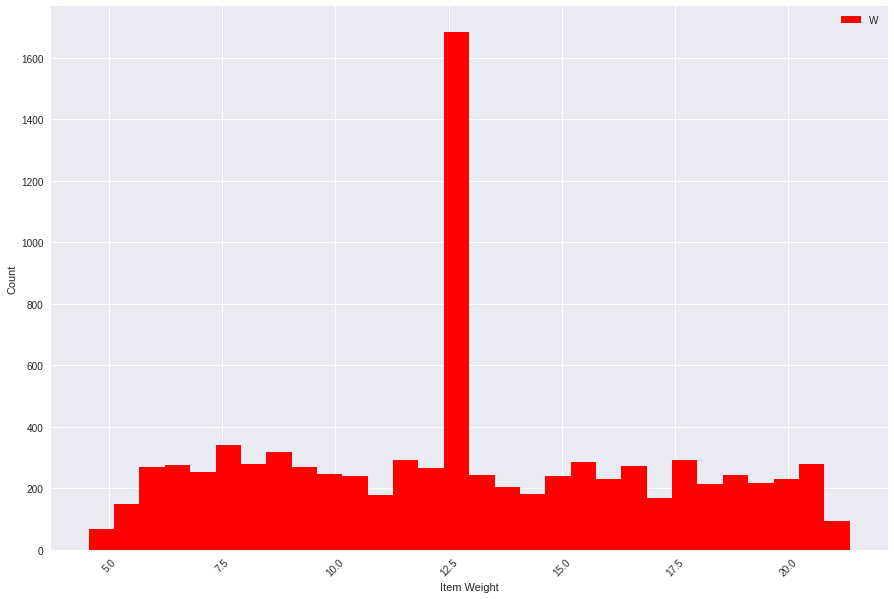

In [ ]:
#Histogram showing Item Weight Distribution
plt.style.use('seaborn')
plt.figure(figsize=(15, 10))
df['Item_Weight'].hist(bins = 30, color='r');
plt.xticks(rotation =45)
plt.legend('Weight')
plt.xlabel("Item Weight")
plt.ylabel("Count")

There's an outlier in the middle skewing abit of the weight distribution. Must have been brought about by the imputation done on this column.

Outlet Features Histgorams#

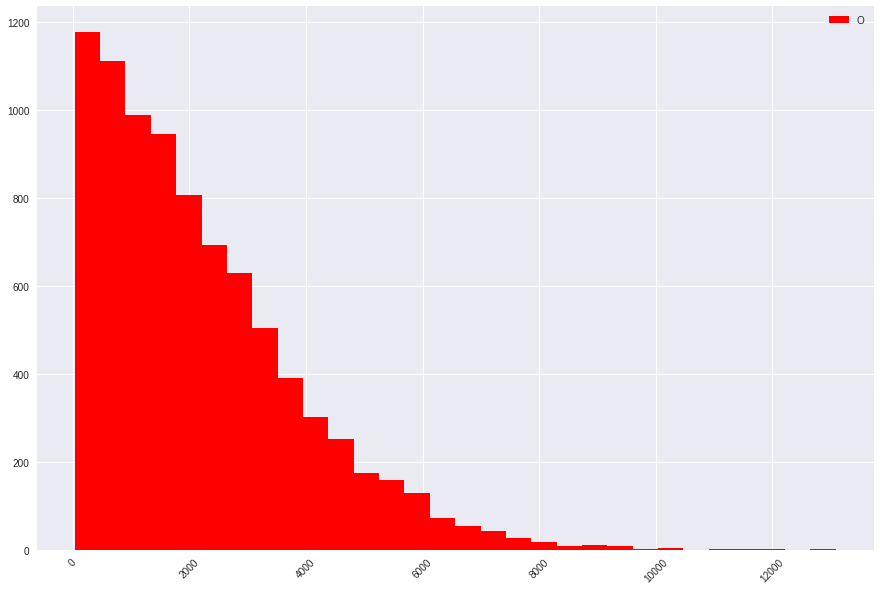

In [ ]:
#Histogram showing Outlet Sales Distribution
plt.style.use('seaborn')
plt.figure(figsize=(15, 10))
df['Item_Outlet_Sales'].hist(bins = 30, color='r');
plt.xticks(rotation =45)
plt.legend('Outlet Sales')

Item Outlet Sales are heavily skewed to the lower side.

Box Plots to View Statistical Summaries of various features of your dataset

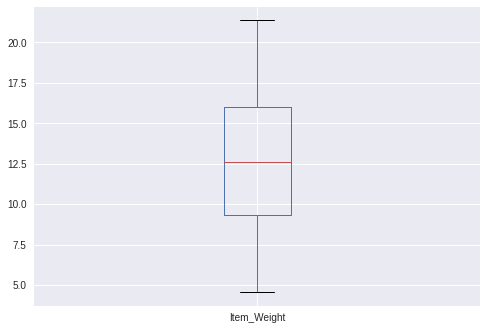

In [ ]:
#A simple box plot showing Item Weight Distribution
df.boxplot(column = 'Item_Weight');
plt.title('');
plt.suptitle('');

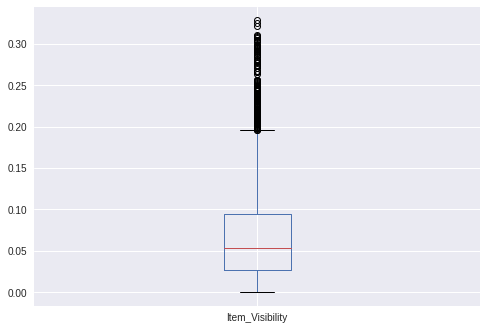

In [ ]:
#A simple box plot showing Item Visibility Distribution
df.boxplot(column = 'Item_Visibility');
plt.title('');
plt.suptitle('');

Shows too many outliers.. 

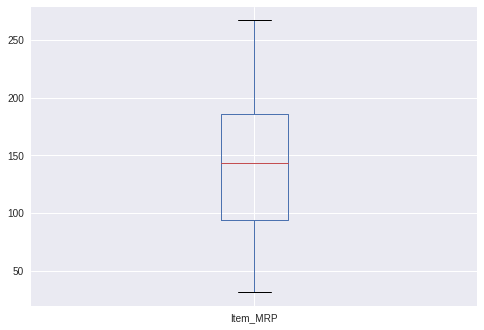

In [ ]:
#A simple box plot showing Item Minimum Retail Price Distribution
df.boxplot(column = 'Item_MRP');
plt.title('');
plt.suptitle('');

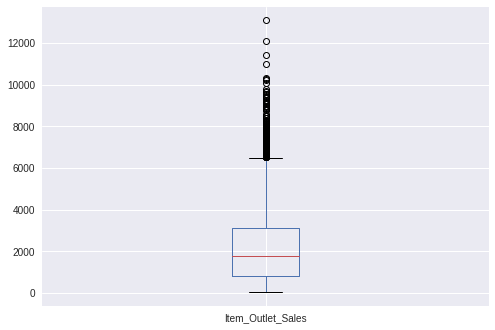

In [ ]:
#A simple box plot showing Item Weight Distribution
df.boxplot(column = 'Item_Outlet_Sales');
plt.title('');
plt.suptitle('');

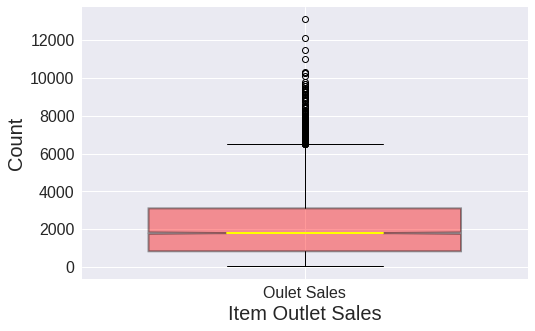

In [ ]:
#Create a Notched Boxplot for Item_Outlet Sales
outlet_sales = df['Item_Outlet_Sales']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot(outlet_sales,
           notch = True,
           labels=['Oulet Sales'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Item Outlet Sales', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


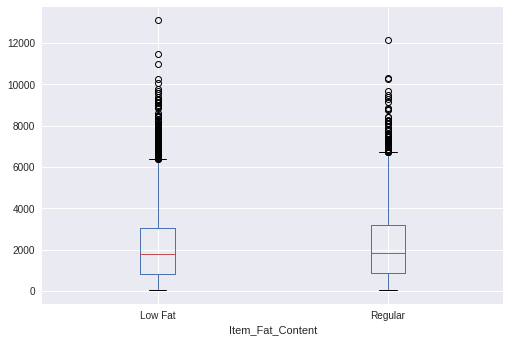

In [ ]:
df.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Fat_Content');
plt.title('');
plt.suptitle('');

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


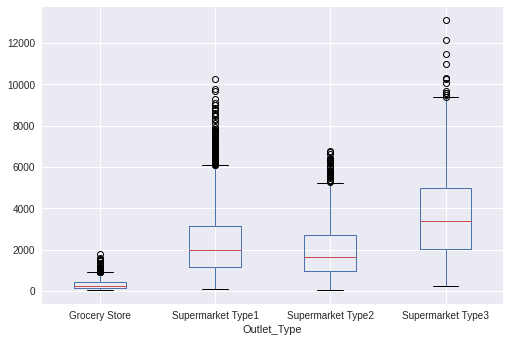

In [ ]:
df.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Type');
plt.title('');
plt.suptitle('');

Correlations

In [ ]:
corr = df.corr()

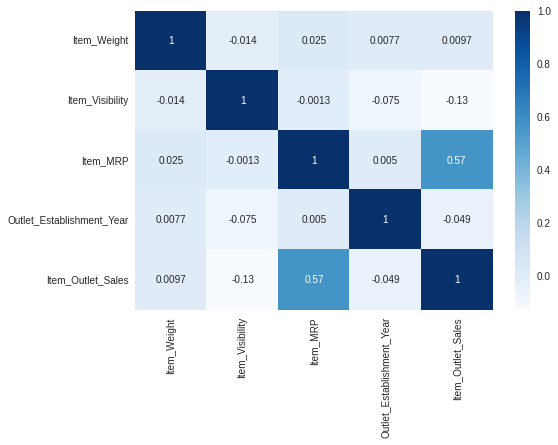

In [ ]:
#Create HeatMap with Annotations
sns.heatmap(corr,cmap = 'Blues', annot = True);

There's moderate Positive correlation between Item_MRp and Item_Outlet_Sales

There's also a moderate Negative Correlatioono between Outlet Establishment Year and Outlet Sales

# Part 4

Create a minimum of two data visualizations that help others understand trends in the data (Explanatory Data Analysis)

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


We shall compare Item outlet Sales to Types.

In [ ]:
#Create a data from for only Item Type and Item_Outlet Sales
df1 = pd.DataFrame(df.loc[:,['Item_Type','Item_Outlet_Sales']])
df1

,Item_Type,Item_Outlet_Sales
0,Dairy,3735.1380
1,Soft Drinks,443.4228
2,Meat,2097.2700
3,Fruits and Vegetables,732.3800
4,Household,994.7052
...,...,...
8518,Snack Foods,2778.3834
8519,Baking Goods,549.2850
8520,Health and Hygiene,1193.1136
8521,Snack Foods,1845.5976


In [ ]:
df1['Item_Outlet_Sales'].sum()

18591125.4104

In [ ]:
#Lets see the total sum Item Outlet Sales of each Item Type 
item_sales_by_outlet = df1.groupby('Item_Type')['Item_Outlet_Sales'].sum()
item_sales_by_outlet = item_sales_by_outlet.round(2)

item_sales_by_outlet

Item_Type
Baking Goods             1265525.34
Breads                    553237.19
Breakfast                 232298.95
Canned                   1444151.49
Dairy                    1522594.05
Frozen Foods             1825734.79
Fruits and Vegetables    2820059.82
Hard Drinks               457793.43
Health and Hygiene       1045200.14
Household                2055493.71
Meat                      917565.61
Others                    325517.61
Seafood                   148868.22
Snack Foods              2732786.09
Soft Drinks               892897.72
Starchy Foods             351401.25
Name: Item_Outlet_Sales, dtype: float64

(0.0, 3102065.802)

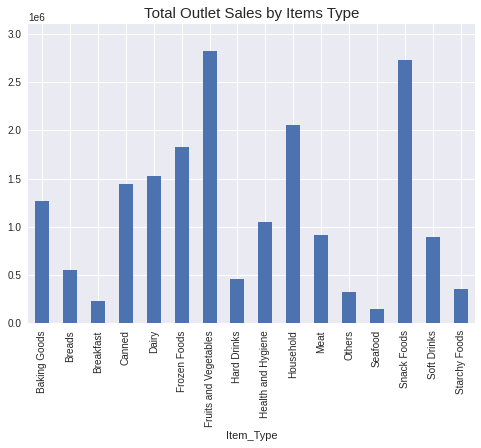

In [ ]:
#plot a simple bar graph
item_sales_by_outlet.plot(kind='bar')
plt.title('Total Outlet Sales by Items Type', fontsize =15)

plt.ylim(0, item_sales_by_outlet.max()*1.1)  # set the upper limit to 10% higher than the maximum value



(0.0, 3102065.802)

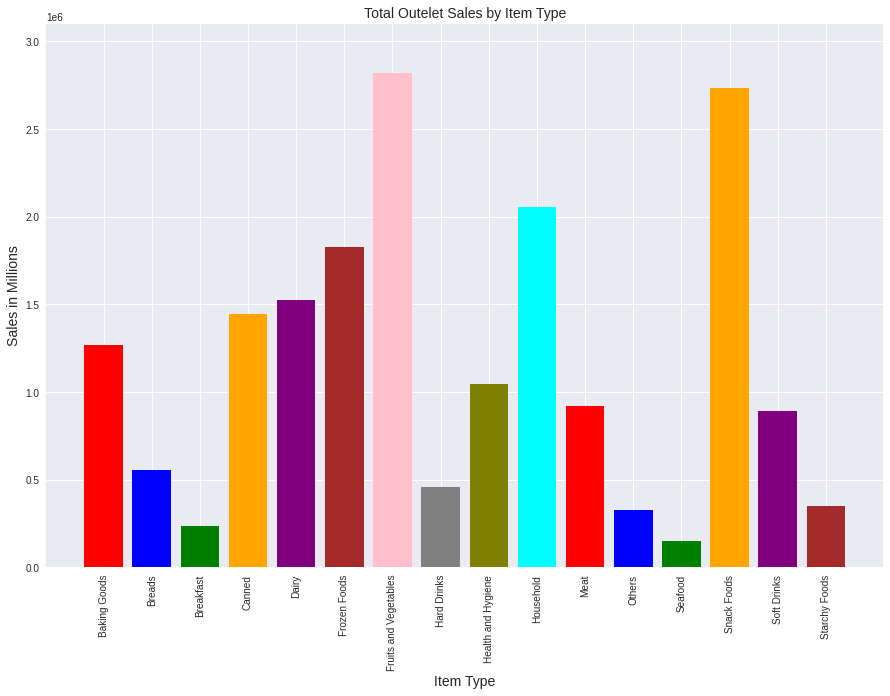

In [ ]:
#Add Colors to the bar graph
#colors for the bars
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

#Create a new figure and axis
fig, axe = plt.subplots(figsize= (15,10))

#create a bar plot and set color
axe.bar(item_sales_by_outlet.index,item_sales_by_outlet.values,color=colors)


#set axis labels
axe.set_xlabel('Item Type',fontsize =14)
axe.set_ylabel('Sales in Millions', fontsize =14)
axe.set_title('Total Outelet Sales by Item Type',fontsize =14)

# Rotate the x-axis labels
axe.set_xticklabels(item_sales_by_outlet.index, rotation=90)



#set the y-axis limts
axe.set_ylim(0,item_sales_by_outlet.max()*1.1)



Lets Compare Outlet Type by Item Outlet Sales

In [ ]:
#Create a data from for only Item Type and Item_Outlet Sales
df2 = pd.DataFrame(df.loc[:,['Outlet_Type','Item_Outlet_Sales']])
df2

,Outlet_Type,Item_Outlet_Sales
0,Supermarket Type1,3735.1380
1,Supermarket Type2,443.4228
2,Supermarket Type1,2097.2700
3,Grocery Store,732.3800
4,Supermarket Type1,994.7052
...,...,...
8518,Supermarket Type1,2778.3834
8519,Supermarket Type1,549.2850
8520,Supermarket Type1,1193.1136
8521,Supermarket Type2,1845.5976


In [ ]:
df2.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()

Outlet_Type
Grocery Store        3.680343e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
item_sales_by_outlet_type = df2.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
item_sales_by_outlet_type = item_sales_by_outlet_type.round(2)

item_sales_by_outlet_type

Outlet_Type
Grocery Store          368034.27
Supermarket Type1    12917342.26
Supermarket Type2     1851822.83
Supermarket Type3     3453926.05
Name: Item_Outlet_Sales, dtype: float64

(0.0, 14209076.486000001)

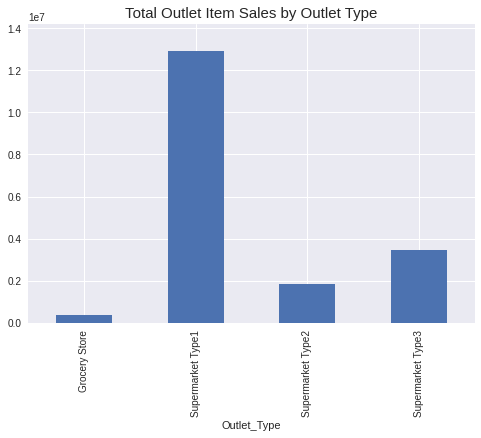

In [ ]:
#plot a simple bar graph
item_sales_by_outlet_type.plot(kind='bar')
plt.title('Total Outlet Item Sales by Outlet Type', fontsize =15)

plt.ylim(0, item_sales_by_outlet_type.max()*1.1)  # set the upper limit to 10% higher than the maximum value


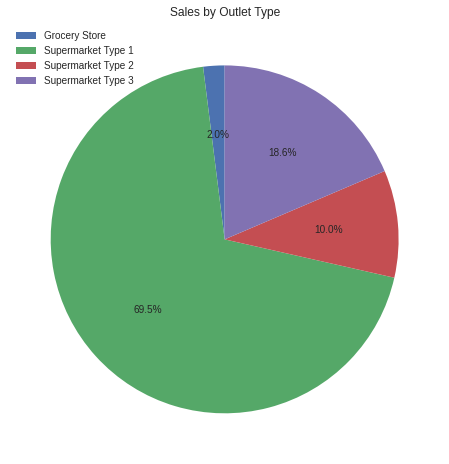

In [ ]:
#make a pie chart for Item Outlet Sales by Outlet Type
labels1 = 'Grocery Store', 'Supermarket Type 1','Supermarket Type 2', 'Supermarket Type 3'

plt.figure(figsize=(10,8))

plt.pie(item_sales_by_outlet_type.values,
        labels = None,
        autopct = '%1.1f%%',
        startangle=90,
        )

plt.title('Sales by Outlet Type')

#Add legend
plt.legend(labels=labels1,loc='upper left')


We see from the Pie Chart above that Supermarket Type 1 had the biggest percentage of sales, followed by SuperMarket Type 2

# Project 1 - Part 5 (Core)

In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')


In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The number of missing Values in Outlet Size seems to be too big to do an Ordinal Encoding before a validation split. So we shall add an Ordinal Encoder to the preprocessing pipeline. 

In [9]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.  

In [10]:
# Define features X and target y
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

#Perform a train test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [11]:
#ordinal Selectors
 
ord_outlet_size = ['Small','Medium','High']
ord_item_fat= ['Low Fat','Regular']

#ordinal Columns
ord_cols = ['Outlet_Size', 'Item_Fat_Content']

In [12]:
#instantiate Ordinal Encoder add a parameter to handle missing values
oe = OrdinalEncoder(categories=[ord_outlet_size,ord_item_fat],handle_unknown='use_encoded_value', unknown_value=-1)

In [13]:
# Create Selectors for Categories and Numbers
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')


Instantiate Imputers and Transformers

In [14]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)


Create Pipelines

In [15]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe




Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [16]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

Create Column Transformer

In [17]:
#ordinal Pipeline
ord_pipe = make_pipeline(freq_imputer,oe)
ord_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High'],
                                            ['Low Fat', 'Regular']],
                                handle_unknown='use_encoded_value',
                                unknown_value=-1))])

In [18]:
#tuples for column transformer
number_tuple = (numeric_pipe,num_selector)
category_tuple = (categorical_pipe, cat_selector)
ordinal_tuple = (ord_pipe,ord_cols)

#ColumnTransformer
preprocessor = make_column_transformer(ordinal_tuple,number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Low '
                                                                              'Fat',
                                                                              'Regular']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['Outlet_Size', 'Item_Fat_Content']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimput...
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd214d987c0>),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd214d987f0>)])

Fit the Column transformer to the X_train

In [19]:
# fit on train
preprocessor.fit(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Low '
                                                                              'Fat',
                                                                              'Regular']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['Outlet_Size', 'Item_Fat_Content']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimput...
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd214d987c0>),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd214d987f0>)])

Tranform Train and Test Datasets

In [20]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [21]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1594)




array([[ 1.        ,  0.        ,  0.81724868, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  1.        ,  0.5563395 , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  1.        , -0.13151196, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  0.        ,  1.11373638, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  1.76600931, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.81724868, ...,  1.        ,
         0.        ,  0.        ]])

In [22]:
#transform the array into a DataFrame.
X_train_df = pd.DataFrame(X_train_processed)
X_train_df

,0,1,2,3,4,5,6,7,8,9,...,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593
0,1.0,0.0,0.817249,-0.712775,1.828109,1.327849,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.556340,-1.291052,0.603369,1.327849,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,1.0,-0.131512,1.813319,0.244541,0.136187,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,-1.169219,-1.004931,-0.952591,0.732018,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.528819,-0.965484,-0.336460,0.493686,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,1.0,1.0,-0.832409,4.309657,-0.044657,0.017021,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,1.0,0.0,0.639356,1.008625,-1.058907,1.089517,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6389,1.0,0.0,1.113736,-0.920527,1.523027,0.493686,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6390,1.0,0.0,1.766009,-0.227755,-0.383777,1.089517,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
